# Hierarchical Data Formats Version 5 (HDF5)
- <ins>Alvarado Morán Óscar</ins>
- <ins>Bermúdez Marbán Dante</ins>

## ¿Qué es?
Es un formato de archivo de código abierto que admite datos grandes, complejos y heterogéneos. HDF5 utiliza una estructura similar a un "directorio de archivos" que le permite organizar los datos dentro del archivo de muchas formas estructuradas diferentes, como lo haría con los archivos en su computadora. El formato HDF5 también permite la incrustación de metadatos haciéndolo autodescriptivo.”[1]

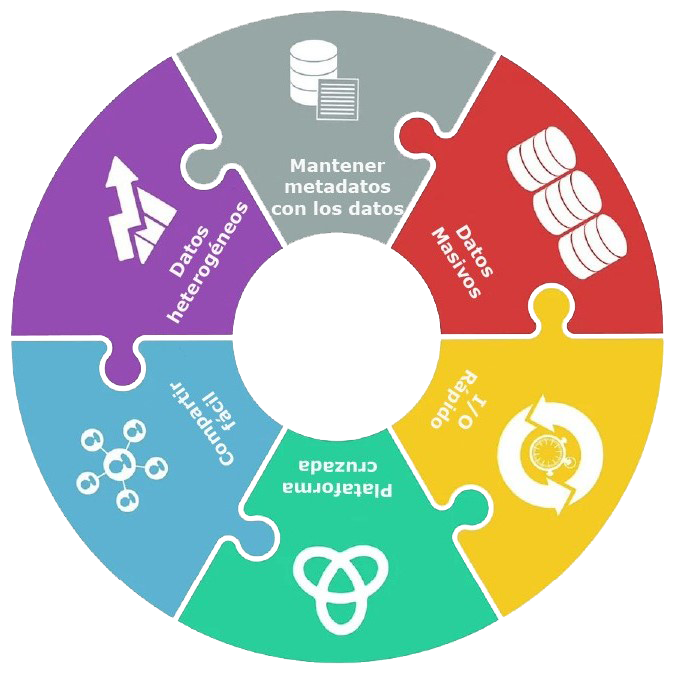

## ¿Cuándo usarlo?
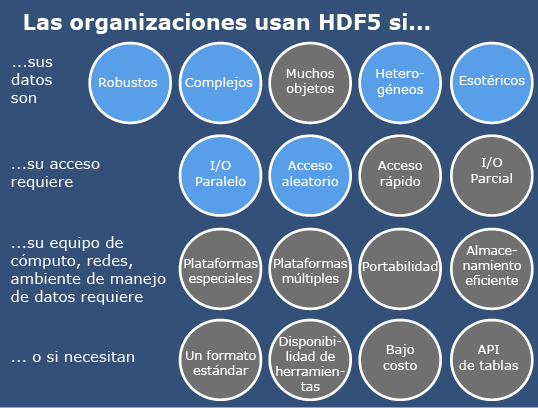

## ¿Dónde se usa actualmente?
- Astronomía 
- Dinámica de Fluidos 
- Computacional
- Ciencias de la tierra
- Ingeniería
- Finanzas
- Genómica
- Medicina
- Física


-------------------------------------------------

# Herramienta para lectura/escritura de archivos HDF5.
### Conceptos básicos
Un archivo HDF5 es un contenedor para dos tipos de objetos: 
- Conjuntos de datos: son colecciones de datos en forma de matriz.
- Grupos, que son contenedores en forma de carpeta que contienen conjuntos de datos y otros grupos. 

Lo más fundamental para recordar cuando se usa h5py es:

<h1><center>
Los grupos funcionan como diccionarios y los datasets como arreglos de numpy
</center></h1>

In [1]:
import h5py as h5
import numpy as np
import matplotlib.pyplot as plt

## Clase de manejo de documentos HDF5

In [2]:
class Lectura_hdf5(h5.File):
    """
    Clase para lectura documentos HDF5
    """
    
    def __init__(self, path_archivo):
        """
        Método para la lectura que se inicializa al invocar la clase 'Lectura_hdf5'.
        
        Parámetros
        ------
        path_archivo: string
            La dirección virtual del archivo que queremos leer.  
            
        Returns
        ------
        Objeto hdf5
            Archivo hdf5 que se puede manipultar mediante los métodos de la clase 'File' de h5py.
            Se piensa que serán un archivo desde el cual se leerá y utilizará su contenido .
        """
        super().__init__(path_archivo, mode = 'a')
        
    
     
    
    def ver_estructura(self):
        """
        Método para ver la estructura del documento hdf5 que se está leyendo. Un '+' al principio de un 
        reenglón significa que la dirección apunta a un grupo. Un '-' al principio de un renglón significa
        que la dirección apunta a un dataset.
        
        Parámetros
        ------
        """
        def imprimir(name):
            espacios = name.count('/')
            try:
                self[f'{name}'].shape
                if espacios == 0:
                    print('')
                    print('-',name)
                else:
                    print('-',' '*(espacios), name)

            except:

                if espacios == 0:
                    print('')
                    print('+',name)
                else:
                    print('+',' '*(espacios), name)
                    
                    
        self.visit(imprimir)
        
        
    def cd(self, direccion):
        """
        Método para cambiar globalmente la dirección en donde nos econtramos del documento hdf5.
        El directorio raiz viene dado por '/'.
        
        Parámetros
        ------
        direccion: string
            Camino al que nos querramos mover dentro del documento, puede ser el nombre de un grupo 
            o dataset dentro del grupo que nos encontremos, un camino de subgrupos o la dirección 
            completa empezando por '/'.
            
        Returns
        ------
            Grupo o dataset, dependiendo de la dirección a la que nos estemos moviendo.
        """
        try:
            self = self[direccion]
        except:
            print('Esa no es una dirección existente en el documento')
            
        return self
    
    def caracteristicas_dataset(self, direccion):
        """
        Método que nos muestra las características principales de un dataset, éstas son las dimensiones, 
        el tamaño y el tipo de datos que contiene. 
        
        Parámetros
        ------
        direccion: string
            Camino dentro del documento en el cual se encuentre el dataset del que queremos saber sus
            características, puede ser el nombre del dataset dentro del grupo que nos encontremos,
            un camino de subgrupos o la dirección completa empezando por '/'.
            
        Returns
        ------
        dimensiones
            Tupla que contiene las dimensiones del dataset, (M,N) si es una matriz, pero no se limita a
            ser dos dimensional.
        num_elementos
            Número total de elementos que contiene el dataset.
        tipo
            Tipo (el más general) de datos que contiene el dataset.
        """
        try:
            dimensiones = self[direccion].shape
            num_elementos = self[direccion].size
            tipo = self[direccion].dtype
            
            print(f'Dimensiones: {dimensiones}')
            print(f'Número de elementos: {num_elementos}')
            print(f'Tipo: {tipo}')
            
            return dimensiones, num_elementos, tipo
        except:
            print('El objeto seleccionado no es un dataset o no es una dirección dentro del documento')
            
    def obtener_dataset(self, direccion, as_numpy = False):
        """
        Método para asignar a una variable un dataset contenido en el documento hdf5 que se esté leyendo.
        
        Parámetros
        -------
        direccion: string
            Camino dentro del documento en el cual se encuentre el dataset que se quiera obtener 
            como arreglo, puede ser el nombre del dataset dentro del grupo que nos encontremos,un 
            camino de subgrupos o la dirección completa empezando por '/'.
            
        as_numpy: boolean
            Si se selecciona as_numpy como 'True', nos devolverá el arreglo numpy directamente.
        Returns
        ------
        arreglo
            Arreglo hdf5 o arreglo numpy
        """
        try:
            arreglo = np.asarray(self[direccion])
            return arreglo

        except:
            print('El objeto seleccionado no es un dataset o no es una dirección dentro del documento')
            
    def obtener_atributos(self, direccion):
        """
        Método para obtener los atributos de un grupo o un dataset.
        Parámetros
        -------
        direccion: string
            Camino dentro del documento en el cual se encuentre el grupo o el dataset del que queremos 
            saber sus atributos, puede ser el nombre del dataset o del grupo dentro del grupo que nos 
            encontremos, un camino de subgrupos o la dirección completa empezando por '/'.
            
        Returns
        ------
        atributos
            Lista de los atributos del grupo o del dataset seleccionado.
        """
        try: 
            atributos = list(self[direccion].attrs)
            if len(atributos) == 0:
                print('No se tienen atributos.')
            else:
                return atributos
        except:
            print('El documento o la dirección indicada no forman parte del archivo hdf5')
            
    def obtener_contenido_atributos(self, direccion, nombre):
        """
        Método para obtener el contenido de un atributo de un grupo o un dataset.
        Parámetros
        -------
        direccion: string
            Camino dentro del documento en el cual se encuentre el grupo o el dataset del que queremos 
            saber el contenido de uno de sus atributos, puede ser el nombre del dataset o del grupo dentro del grupo que nos 
            encontremos, un camino de subgrupos o la dirección completa empezando por '/'.
        nombre: string
            Nombre del atributo del que se requiera obtener sus elementos
            
        Returns
        ------
        atributos
            Lista de los elementos del atributo del grupo o del dataset seleccionado.
        """
        try: 
            elementos = self[direccion].attrs[nombre]
            return elementos
        except:
            print('Algo salió mal.')
            
    def cerrar(self):
        """
        Método para cerrar la sesión de lectura del documento hdf5.
        """
        self.close() 

In [3]:
class Escritura_hdf5(Lectura_hdf5):
    """
    Clase manejadora de objetos para escritura de documentos HDF5. Hereda todas las características
    de la clase 'Lectura_hdf5'.
    """
    def __init__(self, path_archivo):
        """
        Método que instancia un objeto tipo 'h5py._hl.files.File' dada una dirección. Si la 
        dirección no especifica un archivo hdf5, entonces lo creará y se podrá manipular.
        
        Parámetros
        ------
        path_archivo: string
            La dirección virtual del archivo sobre el que se quiera escribir.
        """
        super().__init__(path_archivo)
        

    
    def crear_dataset(self, direccion, datos):
        """
        Método para crear un dataset dentro de un documento hdf5.
        
        Parámetros
        ------
        direccion: string
            Camino dentro del documento en donde se quiera crear un nuevo dataset, 
            puede ser el nombre del dataset directamente, un camino de subgrupos 
            desde la dirección en donde nos encontremos o la dirección completa 
            empezando por '/'.
        datos: numpy array
            Arreglo numpy desde el que se creará el dataset.
        """
        self.create_dataset(direccion, data = datos)    
    
    def crear_grupo(self, direccion):
        """
        Método para crear un grupo dentro de un documento hdf5.
        
        Parámetros
        ------
        direccion: string
            Camino dentro del documento en donde se quiera crear un nuevo grupo, 
            puede ser el nombre del grupo directamente, un camino de subgrupos 
            desde la dirección en donde nos encontremos o la dirección completa
            empezando por '/'.
        """
        self.create_group(direccion)
        
    def crear_atributo(self, nombre, datos):
        """
        Método para crear un atributo de un grupo o de un dataset.
        
        Parámetros
        ------
        nombre; string
            nombre del atributo que se quiera crear.
            
        datos: numpy array
            Arreglo numpy que contendrá los datos del atributo que se esté creando.
        """
        try:
            self.attrs.create(nombre, data = datos)
        except: 
            print('Algo salió mal')
            
    def modificar_atributo(self, nombre, valor):
        """
        Método para modificar un atributo de un grupo o dataset.
        
        Parámetros
        ------
        nombres: string
            Nombre del atributo que se quiera modificar.
        valor: numpy array
            Arreglo numpy del nuevo valor del atributo que se esté modificando.
        """
        try:
            self.attrs.modify(nombre, value = valor)
        except: 
            if nombre not in list(self.escritura.attrs):
                print(f"El atributo '{nombre}' no existe en el objeto '{self.escritura}'")
            else: 
                print(f"El formato del valor asignado al atributo '{nombre}' no es un arreglo de numpy")
                
    def limpiar(self, direccion):
        """
        Método para eliminar todo lo que se encuentre dentro de un grupo dado.
        
        Parámetros:
        ------
        direccion: string
            Camino dentro del documento de donde se quiera borrar su contenido, 
            puede ser el nombre del grupo directamente, un camino de subgrupos 
            desde la dirección en donde nos encontremos o la dirección completa
            empezando por '/'.
        """
        try:
            self[direccion].clear()
        except:
            print('La dirección introducida no se puede limpiar porque no existe en el documento.')

## Usando las clases hechas

In [41]:
# Leyendo el archivo.
f = Lectura_hdf5(path_archivo = 'NEONDSImagingSpectrometerData.h5')

# Obtenemos e imprimimos una lista de los datasets contenidos en el archivo hdf5
f.ver_estructura()


- Reflectance

- fwhm

- map info

+ spatialInfo

- wavelength


In [42]:
# Extrayendo datos de reflectancia del archivo hdf5
reflectancia = f.obtener_dataset('Reflectance')
print(reflectancia.shape)

# Extrayendo un pixel de los datos
datos_reflectancia = reflectancia[:,49,392]
datos_reflectancia = datos_reflectancia.astype(float)
datos_reflectancia.shape

(426, 502, 477)


(426,)

In [43]:
# Dividiendo los datos por el factor de escala
# Nota: se tiene que acceder a esta información mediante los metadatos
factor_escala = f.obtener_contenido_atributos("/Reflectance","Scale Factor")
datos_reflectancia /= factor_escala
longitud_onda = f.obtener_dataset('wavelength')
datos_longitud_onda = longitud_onda[:]
# Transponer los datos para que la longitud de onda esté en una columna
datos_longitud_onda = np.reshape(datos_longitud_onda, 426)

In [44]:
# Imprimiendo los atributos (metadatos):
print("Atributos: ", f.obtener_atributos('/Reflectance'))
print("Características de los datos : ", reflectancia.shape, f.obtener_contenido_atributos('Reflectance', 'DIMENSION_LABELS'))

# Cerrar el archivo
#f.cerrar()

Atributos:  ['DIMENSION_LABELS', 'Description', 'Scale Factor', 'Unit', 'data ignore value', 'row_col_band']
Características de los datos :  (426, 502, 477) [b'Wavelength' b'Line' b'Sample']


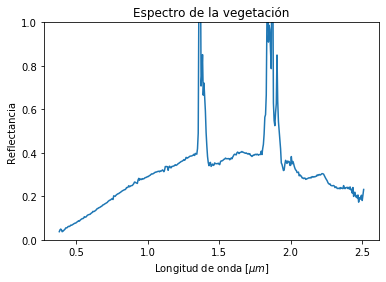

In [46]:
# Plot
plt.plot(datos_longitud_onda, datos_reflectancia)
plt.title("Espectro de la vegetación")
plt.ylabel('Reflectancia')
plt.ylim((0,1))
plt.xlabel('Longitud de onda [$\mu m$]')
plt.savefig("espectro.jpg")
plt.show()

In [25]:
#Escribiendo un nuevo archivo hdf5 conteniendo el espectro
f = Escritura_hdf5("Espectro_vegetacion.h5")
rdata = f.crear_dataset("Espectro_vegetacion", datos = datos_reflectancia)
f.crear_atributo("Longitud_onda", data = datos_longitud_onda)
f.cerrar()

RuntimeError: Unable to create link (name already exists)

In [45]:
comprobacion = Lectura_hdf5('Espectro_vegetacion.h5')
comprobacion.ver_estructura()


- Espectro_vegetacion


In [50]:
comprobacion.obtener_atributos('Espectro_vegetacion')

['Longitud_onda']

In [49]:
comprobacion.obtener_contenido_atributos('Espectro_vegetacion', 'Longitud_onda')

array([0.38227, 0.38728, 0.39229, 0.3973 , 0.40231, 0.40732, 0.41233,
       0.41734, 0.42235, 0.42735, 0.43236, 0.43737, 0.44238, 0.44739,
       0.4524 , 0.45741, 0.46242, 0.46743, 0.47244, 0.47745, 0.48246,
       0.48747, 0.49248, 0.49749, 0.50249, 0.5075 , 0.51251, 0.51752,
       0.52253, 0.52754, 0.53255, 0.53756, 0.54257, 0.54758, 0.55259,
       0.5576 , 0.56261, 0.56762, 0.57263, 0.57763, 0.58264, 0.58765,
       0.59266, 0.59767, 0.60268, 0.60769, 0.6127 , 0.61771, 0.62272,
       0.62773, 0.63274, 0.63775, 0.64276, 0.64776, 0.65277, 0.65778,
       0.66279, 0.6678 , 0.67281, 0.67782, 0.68283, 0.68784, 0.69285,
       0.69786, 0.70287, 0.70788, 0.71289, 0.7179 , 0.72291, 0.72791,
       0.73292, 0.73793, 0.74294, 0.74795, 0.75296, 0.75797, 0.76298,
       0.76799, 0.773  , 0.77801, 0.78302, 0.78803, 0.79304, 0.79804,
       0.80305, 0.80806, 0.81307, 0.81808, 0.82309, 0.8281 , 0.83311,
       0.83812, 0.84313, 0.84814, 0.85315, 0.85816, 0.86317, 0.86818,
       0.87318, 0.87

## h5 directo

In [35]:
# Leyendo el archivo.
f = h5.File('NEONDSImagingSpectrometerData.h5', 'r')
# Obtenemos e imprimimos una lista de los datasets contenidos en el archivo hdf5
dataset_names = [n for n in f.keys()]
for n in dataset_names:
    print(n)

Reflectance
fwhm
map info
spatialInfo
wavelength


In [36]:
# Extrayendo datos de reflectancia del archivo hdf5
reflectancia = f['Reflectance']
reflectancia
# Extrayendo un pixel de los datos
datos_reflectancia = reflectancia[:,49,392]
datos_reflectancia = datos_reflectancia.astype(float)

In [37]:
# Dividiendo los datos por el factor de escala
# Nota: se tiene que acceder a esta información mediante los metadatos
factor_escala = 10000.0
datos_reflectancia /= factor_escala
longitud_onda = f['wavelength']
datos_longitud_onda = longitud_onda[:]
# Transponer los datos para que la longitud de onda esté en una columna
datos_longitud_onda = np.reshape(datos_longitud_onda, 426)

In [38]:
# Imprimiendo los atributos (metadatos):
print("Descripción de los datos : ", reflectancia.attrs)
print("Dimensión de los datos : ", reflectancia.shape, reflectancia.attrs['DIMENSION_LABELS'])
# Imprimiendo la lista de atributos desde el archivo .hdf5
for n in reflectancia.attrs:
    print(n)
# Cerrar el archivo
f.close()

Descripción de los datos :  <Attributes of HDF5 object at 140663268505376>
Dimensión de los datos :  (426, 502, 477) [b'Wavelength' b'Line' b'Sample']
DIMENSION_LABELS
Description
Scale Factor
Unit
data ignore value
row_col_band


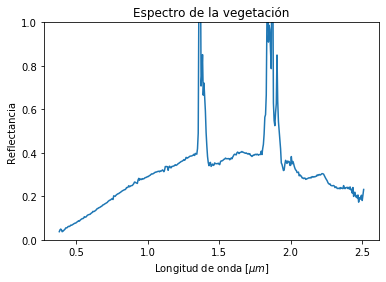

In [39]:
# Plot
plt.plot(datos_longitud_onda, datos_reflectancia)
plt.title("Espectro de la vegetación")
plt.ylabel('Reflectancia')
plt.ylim((0,1))
plt.xlabel('Longitud de onda [$\mu m$]')
plt.show()

In [40]:
#Escribiendo un nuevo archivo hdf5 conteniendo el espectro
f = h5.File("Espectro_vegetacion.h5", "w")
rdata = f.create_dataset("Espectro_vegetacion", data = datos_reflectancia)
attrs = rdata.attrs
attrs.create("Longitud_onda", data = datos_longitud_onda)
f.close()

# Otro

In [4]:
lectorh5 = Lectura_hdf5("red_demo.h5")
lectorh5.ver_estructura()


+ model_weights
+   model_weights/dense
+    model_weights/dense/dense
-     model_weights/dense/dense/bias:0
-     model_weights/dense/dense/kernel:0
+   model_weights/dense_1
+    model_weights/dense_1/dense_1
-     model_weights/dense_1/dense_1/bias:0
-     model_weights/dense_1/dense_1/kernel:0
+   model_weights/dense_2
+    model_weights/dense_2/dense_2
-     model_weights/dense_2/dense_2/bias:0
-     model_weights/dense_2/dense_2/kernel:0
+   model_weights/dense_3
+    model_weights/dense_3/dense_3
-     model_weights/dense_3/dense_3/bias:0
-     model_weights/dense_3/dense_3/kernel:0

+ optimizer_weights
+   optimizer_weights/Adam
+    optimizer_weights/Adam/dense
+     optimizer_weights/Adam/dense/bias
-      optimizer_weights/Adam/dense/bias/m:0
-      optimizer_weights/Adam/dense/bias/v:0
+     optimizer_weights/Adam/dense/kernel
-      optimizer_weights/Adam/dense/kernel/m:0
-      optimizer_weights/Adam/dense/kernel/v:0
+    optimizer_weights/Adam/dense_1
+     optimizer_w

## Referencias:
- [1]https://www.neonscience.org/about-hdf5
- https://www.neonscience.org/hdf5-intro-python
- http://docs.h5py.org/en/latest/quick.html
- https://github.com/h5py/h5py
- http://docs.h5py.org/en/latest/faq.html